In [ ]:
pip install opencv-python matplotlib

### Повышение резкости частотными фильтрами

#### Высокочастотная фильтрация фильтрами идеальным, Баттерворта, Гаусса  

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from libs.frequency import gaussian_high_pass_filter
from libs.frequency import ideal_high_pass_filter
from libs.frequency import butterworth_high_pass_filter
from libs.frequency import spectrum

def apply_high_pass_filter(image, filter_func, *args, **kwargs):
    M, N = image.shape
    P, Q = 2*M, 2*N

    fp = np.zeros((P, Q))
    fp[:M, :N] = image
    
    dft = np.fft.fft2(np.float32(fp))
    dft_shift = np.fft.fftshift(dft)

    # Создание маски фильтра
    H = filter_func(fp.shape, *args, **kwargs)

    # Применение маски
    fshift = dft_shift * H

    # Обратное преобразование Фурье
    f_ishift = np.fft.ifftshift(fshift)
    gp = np.fft.ifft2(f_ishift)
    gp = np.real(gp)
    gp = cv2.normalize(gp, None, 0, 255, cv2.NORM_MINMAX)
    
    g = gp[:M, :N]

    # Извлечение действительной части и нормализация
    # g = np.real(g)
    
    plt.figure(figsize=(14, 8))
    plt.subplot(241), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(242), plt.imshow(fp, cmap='gray'), plt.title('Extended Original Image')
    plt.subplot(244), plt.imshow(spectrum(dft_shift), cmap='gray'), plt.title('Spectrum Image')
    plt.subplot(243), plt.imshow(spectrum(H), cmap='gray'), plt.title('Filter H(u,v)')
    plt.subplot(248), plt.imshow(spectrum(fshift), cmap='gray'), plt.title('G Filtered Image')
    plt.subplot(245), plt.imshow(g, cmap='gray'), plt.title('After Inverse FFT')
    plt.subplot(246), plt.imshow(gp, cmap='gray'), plt.title('Extended After Inverse FFT Image')
    plt.show()

    return np.uint8(g)

# Загрузка изображения
image = cv2.imread('images/galaxy-black-hole.jpg', cv2.IMREAD_GRAYSCALE)

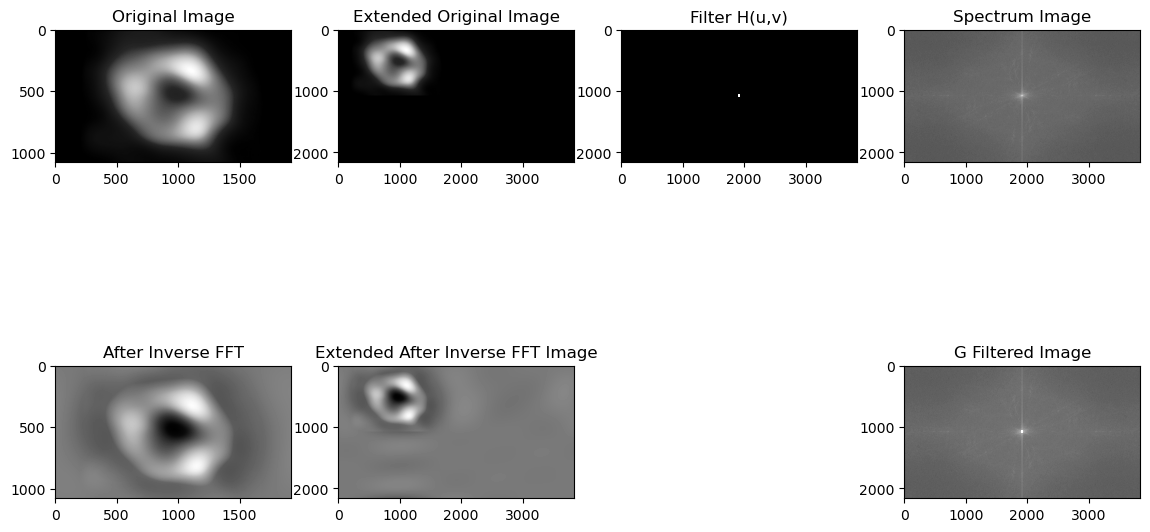

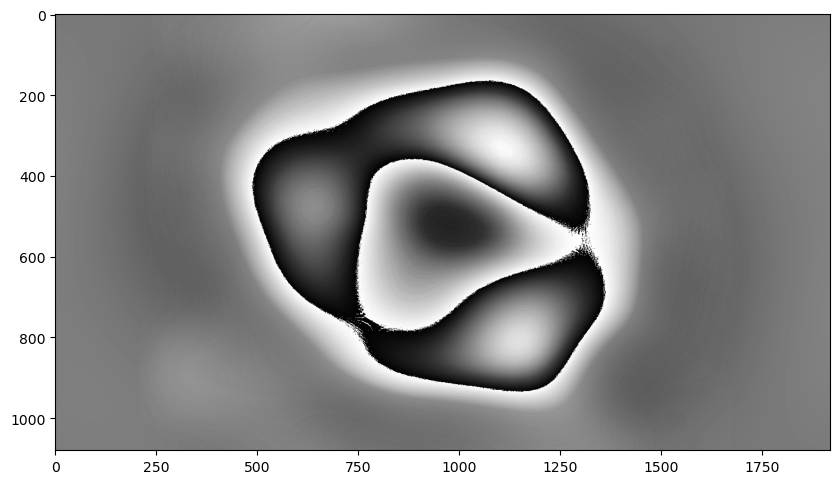

NameError: name 'moon_origin' is not defined

<Figure size 1000x600 with 0 Axes>

In [4]:
# Применение идеального высокочастотного фильтра
ideal_filtered_image = apply_high_pass_filter(image, ideal_high_pass_filter, 3)

plt.figure(figsize=(10, 6))
plt.imshow(image + ideal_filtered_image, cmap='gray')
plt.show()
plt.figure(figsize=(10, 6))
plt.imshow(moon_origin, cmap='gray')
plt.show()

Mask min: 0.009957332236190775, max: 1.0, mean: 0.9999810756626867


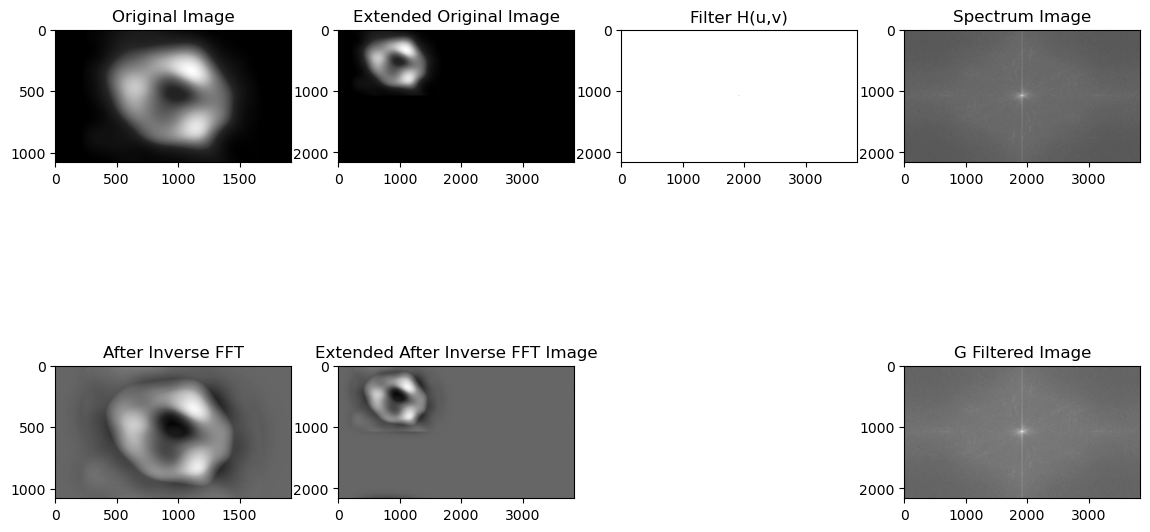

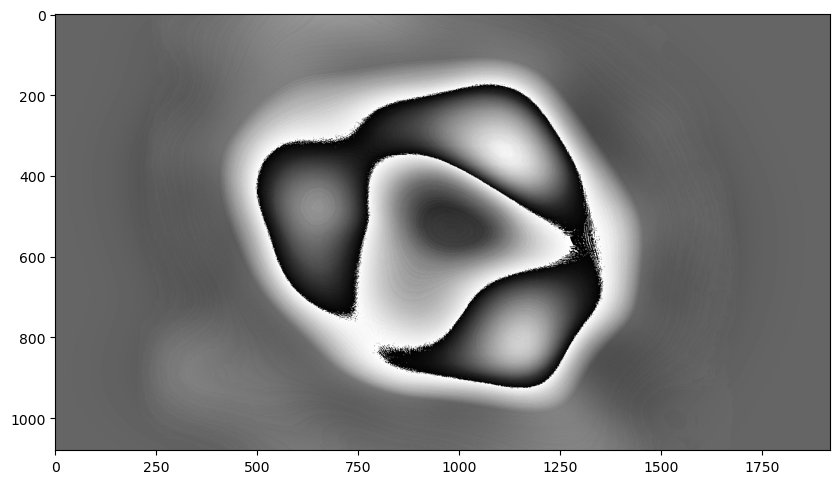

NameError: name 'moon_origin' is not defined

<Figure size 1000x600 with 0 Axes>

In [7]:
# Применение гауссовского высокочастотного фильтра
gaussian_filtered_image = apply_high_pass_filter(image, gaussian_high_pass_filter, 5)

plt.figure(figsize=(10, 6))
plt.imshow(image + gaussian_filtered_image, cmap='gray')
plt.show()
plt.figure(figsize=(10, 6))
plt.imshow(moon_origin, cmap='gray')
plt.show()

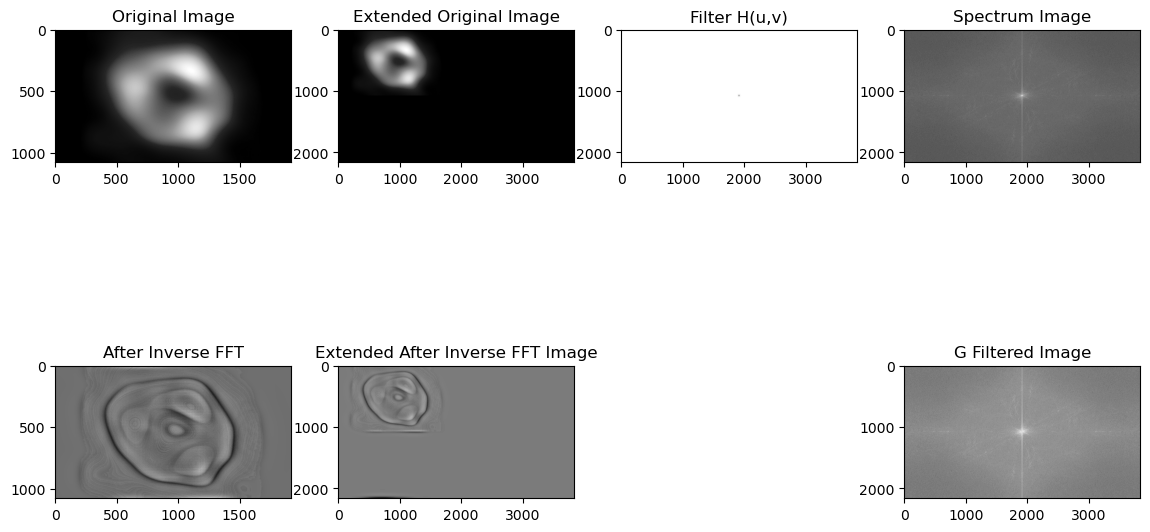

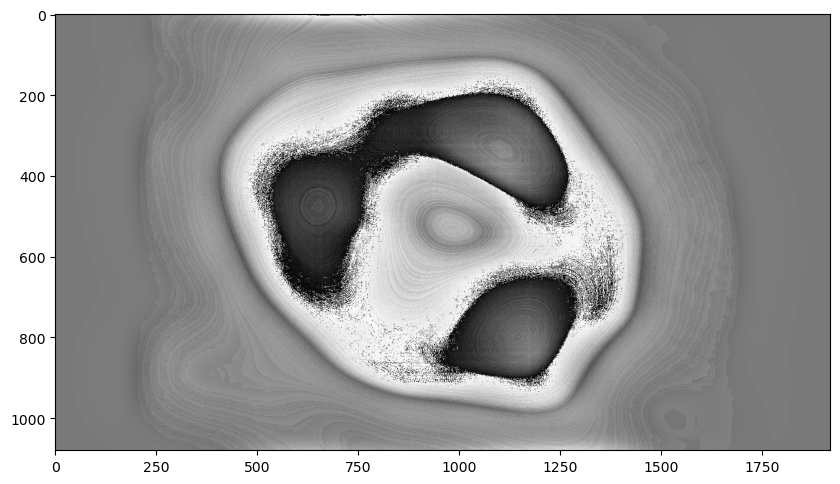

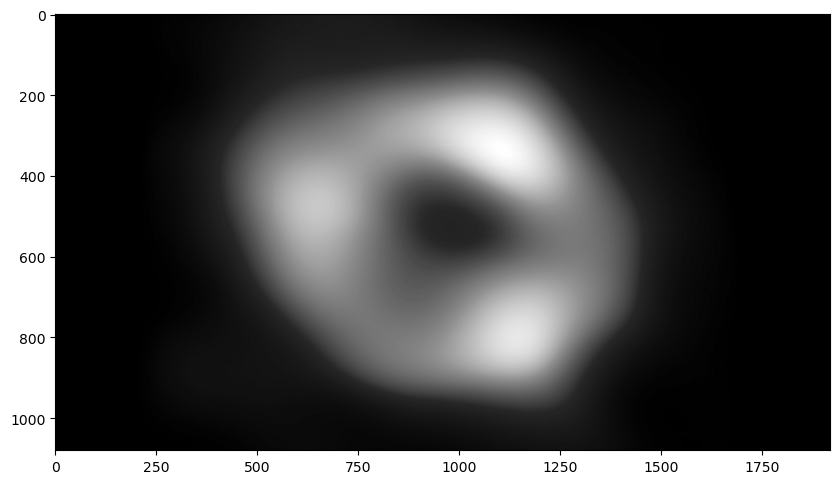

In [9]:
# Применение гауссовского высокочастотного фильтра
black_hole_fft_image = apply_high_pass_filter(image, butterworth_high_pass_filter, 20, 2)

plt.figure(figsize=(10, 6))
plt.imshow(image + black_hole_fft_image, cmap='gray')
plt.show()
plt.figure(figsize=(10, 6))
plt.imshow(image, cmap='gray')
plt.show()

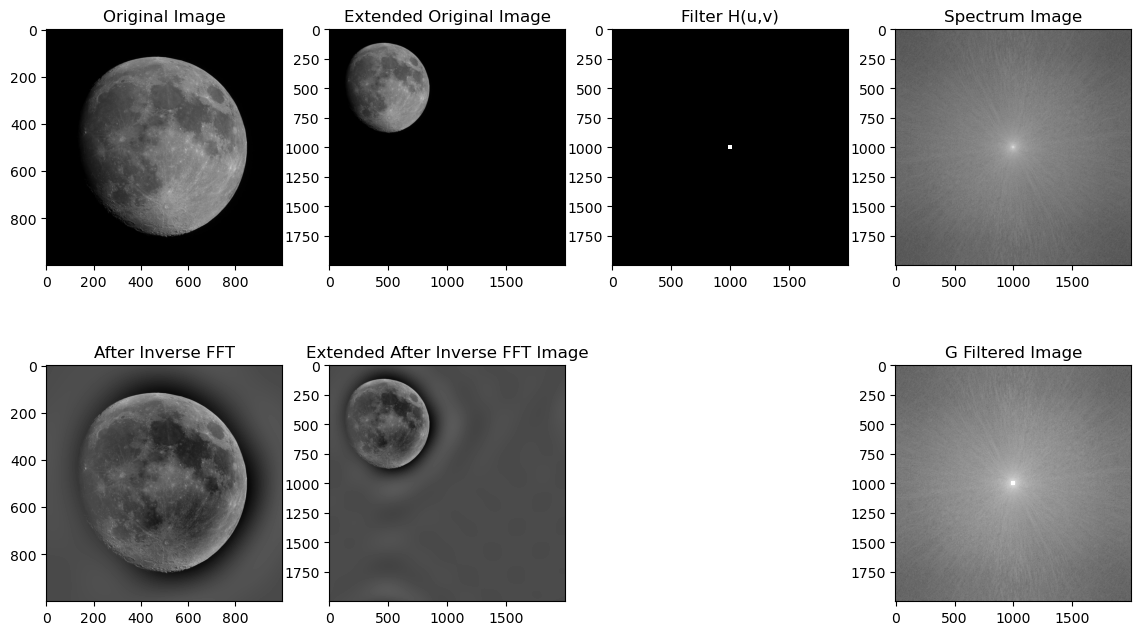

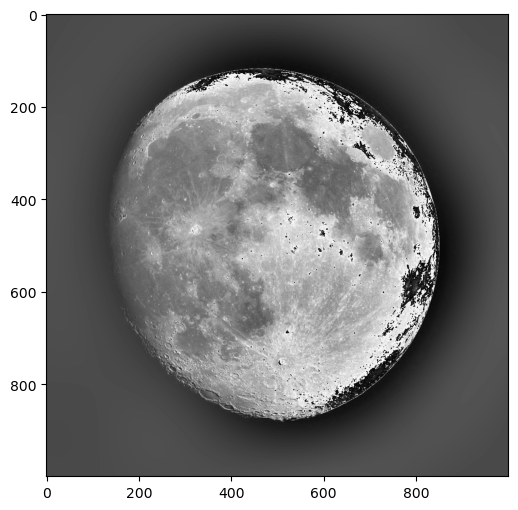

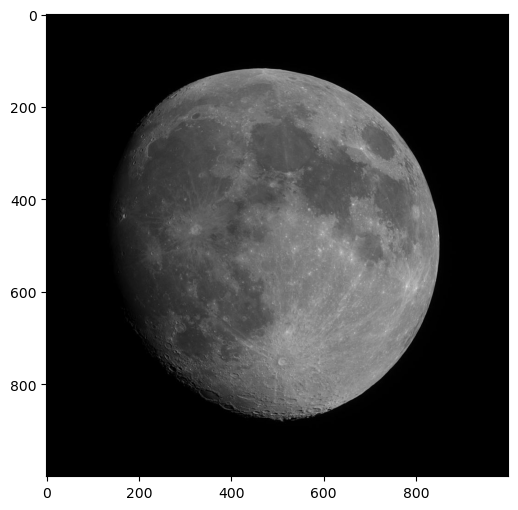

In [14]:
moon_origin = cv2.imread('images/moon.jpg', cv2.IMREAD_GRAYSCALE)
moon_fft_image = apply_high_pass_filter(moon_origin, ideal_high_pass_filter, 5)

plt.figure(figsize=(10, 6))
plt.imshow(moon_origin + moon_fft_image, cmap='gray')
plt.show()
plt.figure(figsize=(10, 6))
plt.imshow(moon_origin, cmap='gray')
plt.show()

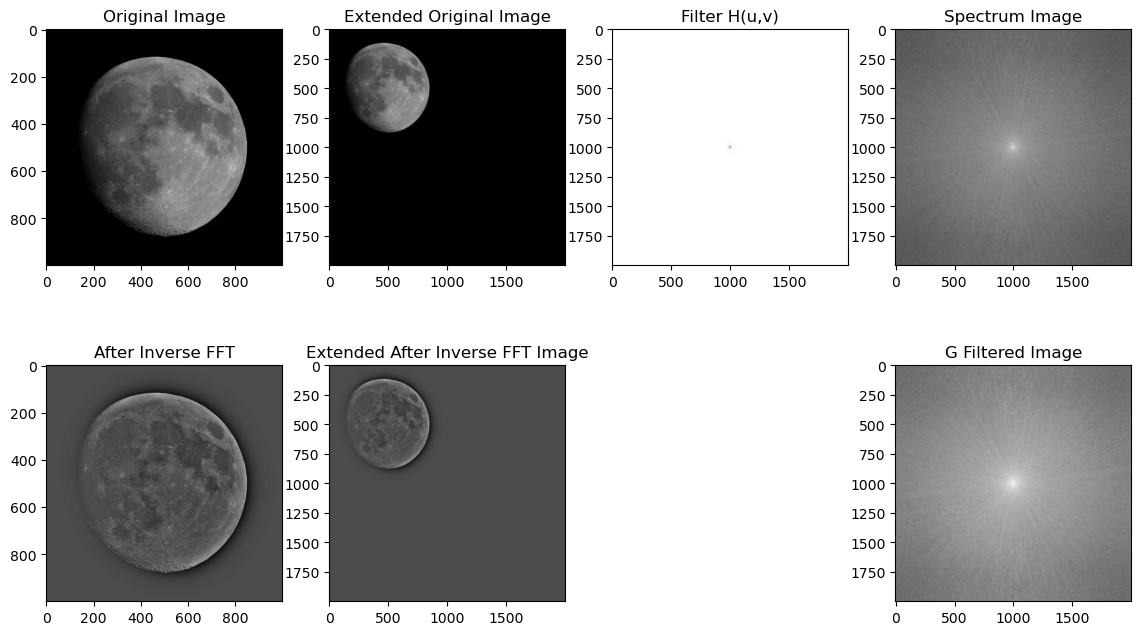

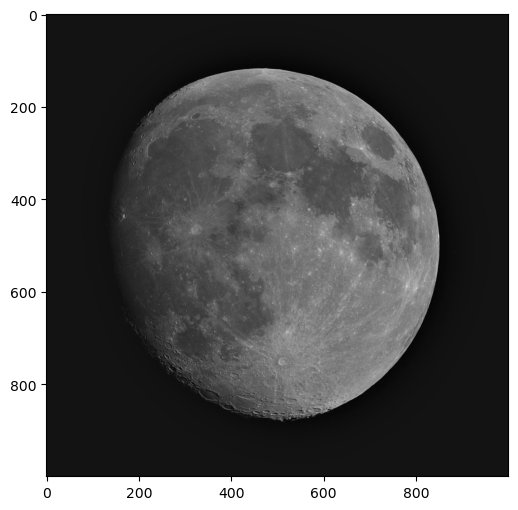

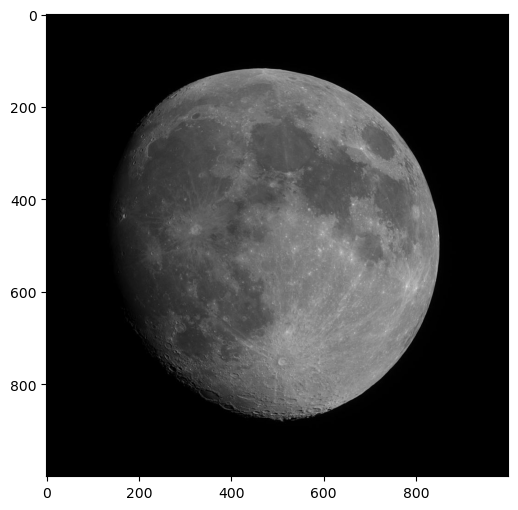

In [24]:
moon_origin = cv2.imread('images/moon.jpg', cv2.IMREAD_GRAYSCALE)
moon_fft_image = apply_high_pass_filter(moon_origin, butterworth_high_pass_filter, 11, 1)

plt.figure(figsize=(10, 6))
plt.imshow((moon_origin + 0.3 * moon_fft_image), cmap='gray')
plt.show()
plt.figure(figsize=(10, 6))
plt.imshow(moon_origin, cmap='gray')
plt.show()

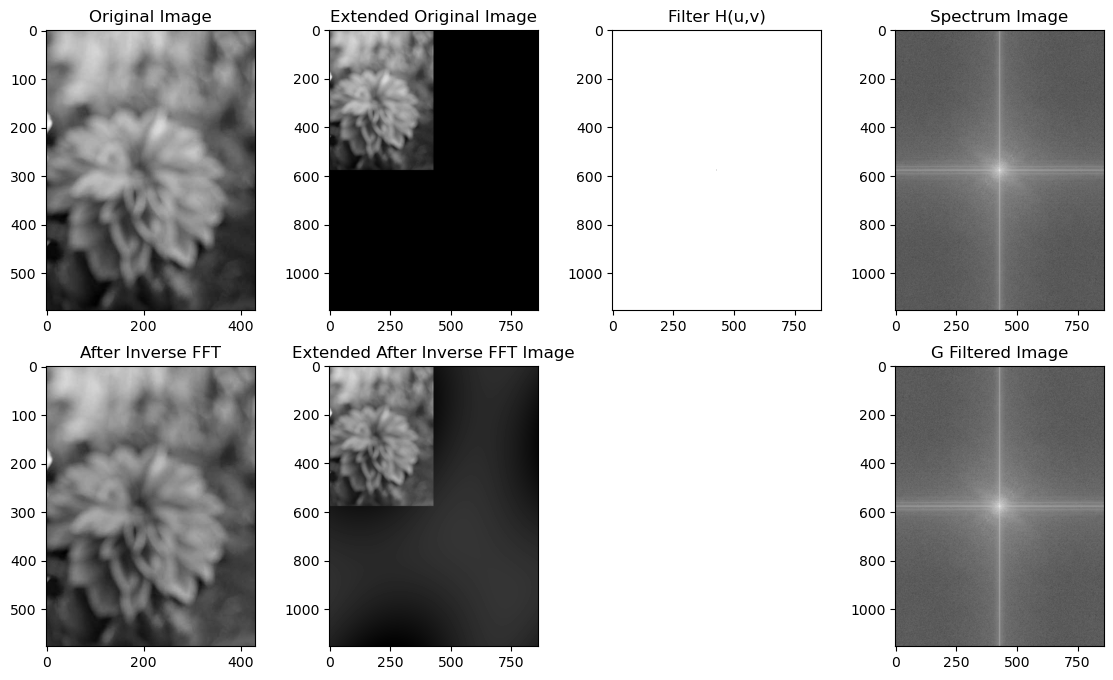

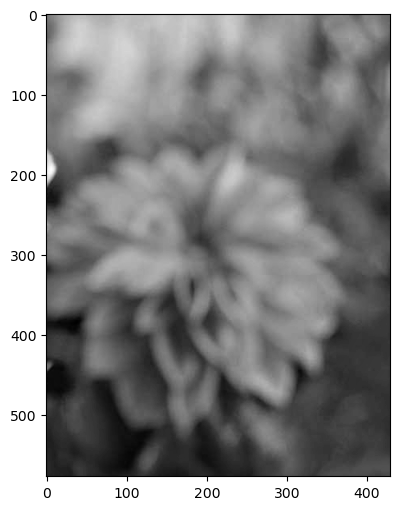

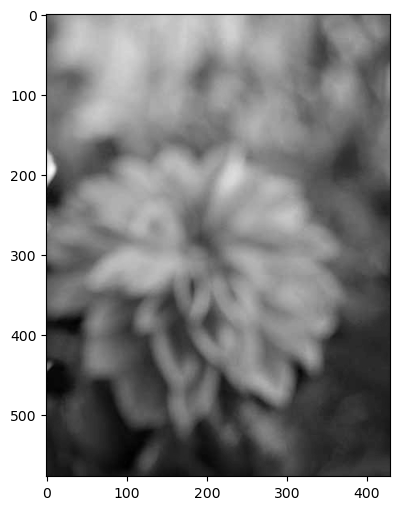

In [36]:
from libs.frequency import gaussian_high_pass_filter
flowers_background_image = cv2.imread('images/flowers-background.jpg', cv2.IMREAD_GRAYSCALE)
flowers_background_fft_image = apply_high_pass_filter(flowers_background_image, butterworth_high_pass_filter, 1, 3)

plt.figure(figsize=(10, 6))
plt.imshow(flowers_background_image + 1.5*flowers_background_fft_image, cmap='gray')
plt.show()
plt.figure(figsize=(10, 6))
plt.imshow(flowers_background_image, cmap='gray')
plt.show()

#### Дополнительная обработка пороговым фильтром

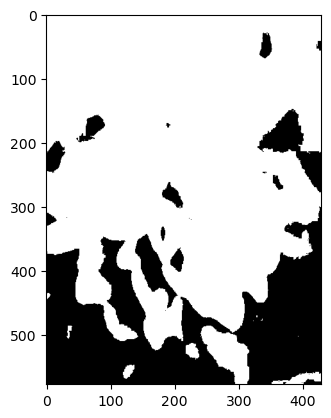

In [43]:
import cv2

_, thresholded_image = cv2.threshold(flowers_background_image + 1.5*flowers_background_fft_image, 200, 255, cv2.THRESH_BINARY)

# Отображение результатов
plt.imshow(thresholded_image, cmap='gray')

#### Повышение резкости используя Лапласиан в частотной области

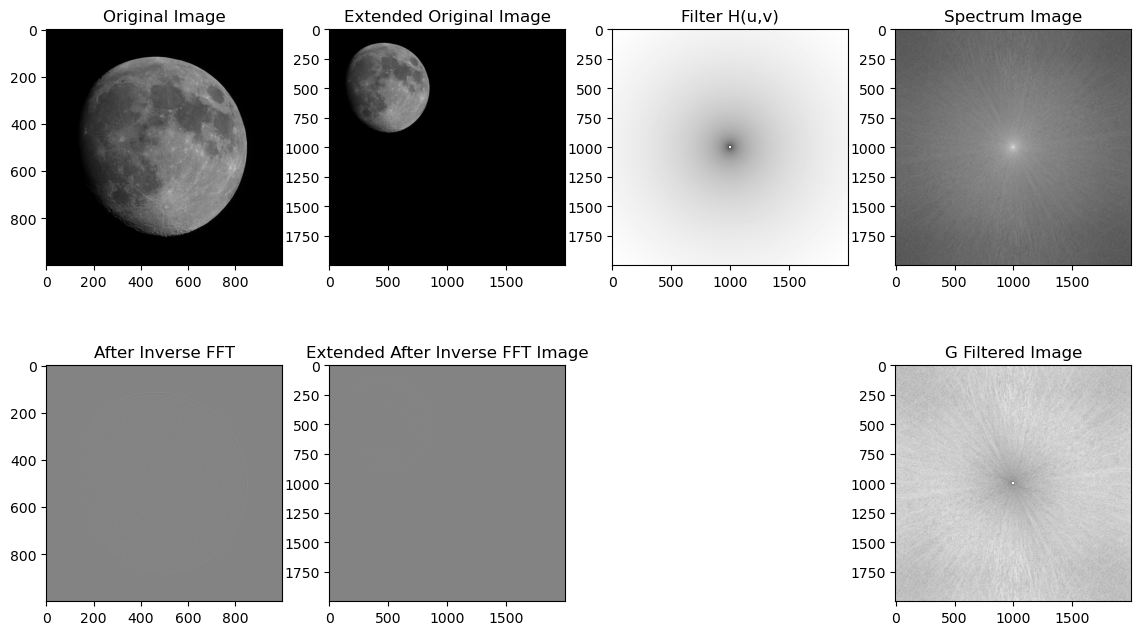

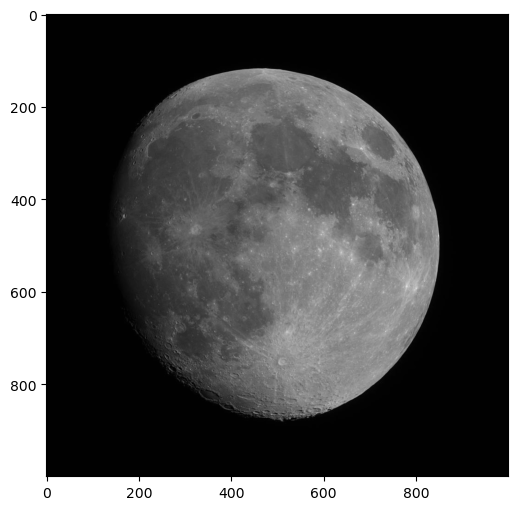

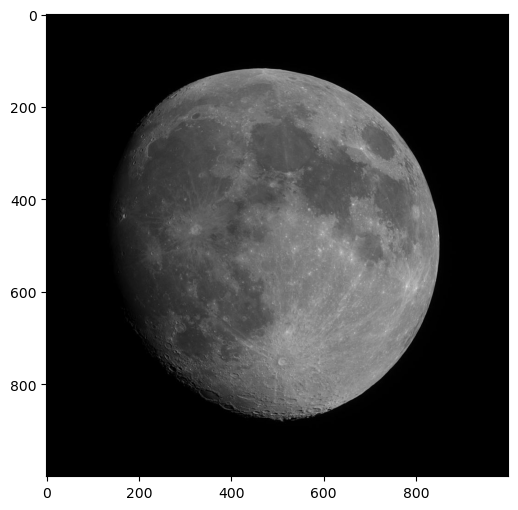

In [53]:
from libs.frequency import laplasian_kernel
moon_origin = cv2.imread('images/moon.jpg', cv2.IMREAD_GRAYSCALE)
laplasian_moon = apply_high_pass_filter(moon_origin, laplasian_kernel)

# / (np.amax(img_back) - np.amin(img_back))

plt.figure(figsize=(10, 6))
plt.imshow(moon_origin + 0.1*laplasian_moon, cmap='gray')
plt.show()
plt.figure(figsize=(10, 6))
plt.imshow(moon_origin, cmap='gray')
plt.show()